In [1]:
from rapidfuzz.distance import LCSseq
import pandas as pd

In [7]:
def longest_common_subsequence(seq1: list, seq2: list):
    m, n = len(seq1), len(seq2)
    f = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if seq1[i - 1] == seq2[j - 1]:
                f[i][j] = f[i - 1][j - 1] + 1
            else:
                f[i][j] = max(f[i - 1][j], f[i][j - 1])
    
    indices_seq1 = []
    i, j = m, n
    while i > 0 and j > 0:
        if seq1[i - 1] == seq2[j - 1]:
            indices_seq1.append(i - 1)
            i -= 1
            j -= 1
        elif f[i - 1][j] > f[i][j - 1]:
            i -= 1
        else:
            j -= 1
    indices_seq1.reverse()

    # Return length and index of the longest common subsequence
    return f[m][n], indices_seq1

In [ ]:
def longest_common_substring(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    max_len = 0
    end_seq1 = 0

    for i in range(m):
        for j in range(n):
            if seq1[i] == seq2[j]:
                dp[i + 1][j + 1] = dp[i][j] + 1
                if dp[i + 1][j + 1] > max_len:
                    max_len = dp[i + 1][j + 1]
                    end_seq1 = i + 1
            else:
                dp[i + 1][j + 1] = 0
    # Calculate the starting index of the substring in seq1
    start_seq1 = end_seq1 - max_len
    # Return the length and starting index of the longest common substring
    return max_len, start_seq1

In [ ]:
def compute_long_comm_substr(r_tab, s_tab, seed_ids, seeds):
    col_pairs = [seeds[i][0] for i in seed_ids] # O(k)
    col_pairs.sort(key=lambda s: s[0], reverse=False) # O(k log k)

    new_r_tab = [r_tab[m[0]] for m in col_pairs] # O(k)
    new_s_tab = [s_tab[m[1]] for m in col_pairs] # O(k)

    # Combine corresponded elements (i.e. in the same row) for specific columns
    combined_r = ["".join(map(str,items)) for items in zip(*new_r_tab)] # O(n * k)
    combined_s = ["".join(map(str,items)) for items in zip(*new_s_tab)] # O(n * k)

    # Compute the LCS algorithm on the two sequences made by the combined rows
    length, idx = longest_common_substring(combined_r, combined_s) # O(n*m)
    return length, idx

In [ ]:

def compute_long_comm_subseq(r_tab, s_tab, seed_ids, seeds):
    col_pairs = [seeds[i][0] for i in seed_ids] # O(k)
    col_pairs.sort(key=lambda s: s[0], reverse=False) # O(k log k)
    # print("col_pairs:", col_pairs)

    new_r_tab = [r_tab[m[0]] for m in col_pairs] # O(k)
    new_s_tab = [s_tab[m[1]] for m in col_pairs] # O(k)
    # print("new_r_tab:", new_r_tab)
    # print("new_s_tab:", new_s_tab)

    # Combine corresponded elements (i.e. in the same row) for specific columns
    combined_r = ["".join(map(str,items)) for items in zip(*new_r_tab)] # O(n * k)
    combined_s = ["".join(map(str,items)) for items in zip(*new_s_tab)] # O(n * k)
    print("combined_r:", combined_r)
    print("combined_s:", combined_s)

    # Compute the LCS algorithm on the two sequences made by the combined rows
    length, idx = longest_common_subsequence(combined_r, combined_s) # O(n^2)
    return length, idx

In [10]:
col_R = ['USA', 'China', 'South Korea', 'China', 'USA', 'Japan']
col_S = ['South Korea', 'China', 'UK', 'USA', 'Sweden']
length, indices = longest_common_subsequence(col_R, col_S)
print("Length of LCS:", length)
print("Indices in col_R:", indices)

Length of LCS: 3
Indices in col_R: [2, 3, 4]


In [13]:
col_R = ['USA', 'China', 'South Korea', 'China', 'USA', 'Japan']
col_S = ['South Korea', 'China', 'UK', 'USA', 'Sweden']
length, index = longest_common_substring(col_R, col_S)
print("Length of LCS:", length)
print("Starting Index in col_R:", index)

Length of LCS: 2
Starting Index in col_R: 2


In [24]:
def parse_table_from_dataframe(table):
    return [table[col].astype(str).tolist() for col in table.columns]
from bitarray import bitarray
seeds = [((0, 0), bitarray('1000010000'), 2, (2, 0), (4, 2)), ((4, 4), bitarray('0000100001'), 2, (2, 0), (4, 2)), ((1, 2), bitarray('0100000100'), 2, (1, 2), (3, 4)), ((2, 1), bitarray('0010001000'), 2, (2, 0), (4, 2)), ((3, 3), bitarray('0001000010'), 1, (0, 3), (1, 4))]

In [40]:
length, index = compute_long_comm_subseq(r_tab_col_list, s_tab_col_list, seed_ids=(0,3), seeds=seeds)
print('Length of Longest Common Subsequence:', length)
print('Index in r_tab_col_list:', index)

combined_r: ['AppleUSA', 'AdidasChina', 'SamsungSouth Korea', 'NikeChina', 'PumaUSA', 'SonyJapan']
combined_s: ['SamsungSouth Korea', 'NikeChina', 'ReebokUK', 'AppleUSA', 'H&MSweden']
Length of Longest Common Subsequence: 2
Index in r_tab_col_list: [2, 3]


In [ ]:
import pandas as pd
dataset_wiki = pd.read_csv('Dataset/wikitables/test.csv')
metadata_wiki = pd.read_csv('Dataset/wikitables/test/metadata.csv')
print('number of pairs:', len(dataset_wiki))

number of pairs: 60000


In [ ]:
print('Mean number of columns:', metadata_wiki['num_columns'].mean())
print('Mean number of rows:', metadata_wiki['num_rows'].mean())
print('Max number of columns:', metadata_wiki['num_columns'].max())
print('Max number of rows:', metadata_wiki['num_rows'].max())
print('Min number of columns:', metadata_wiki['num_columns'].min())
print('Min number of rows:', metadata_wiki['num_rows'].min())
print('number of tables:', len(metadata_wiki))


Mean number of columns: 8.071479194087274
Mean number of rows: 10.201832540245015
Max number of columns: 125
Max number of rows: 255
Min number of columns: 1
Min number of rows: 1
number of tables: 19754


In [13]:
dataset_git = pd.read_csv('Dataset/gittables/test.csv')
metadata_git = pd.read_csv('Dataset/gittables/test/metadata.csv')
print('number of pairs:', len(dataset_git))

number of pairs: 100000


In [14]:
print('Mean number of columns:', metadata_git['num_columns'].mean())
print('Mean number of rows:', metadata_git['num_rows'].mean())
print('Max number of columns:', metadata_git['num_columns'].max())
print('Max number of rows:', metadata_git['num_rows'].max())
print('Min number of columns:', metadata_git['num_columns'].min())
print('Min number of rows:', metadata_git['num_rows'].min())
print('number of tables:', len(metadata_git))


Mean number of columns: 13.088907083175883
Mean number of rows: 151.3312549859344
Max number of columns: 592
Max number of rows: 6013
Min number of columns: 1
Min number of rows: 1
number of tables: 47634


In [1]:
import pandas as pd
df1 = pd.read_csv('final_results_git/test_mapping_ordered_git_1000samples.csv', sep=';')
df2 = pd.read_csv('final_results_git/dup_analysis_git_1000samples.csv', sep=';')
df1["Mapping_density_ratio"] = df2["Mapping_density_ratio"].values
df1.to_csv('final_results_git/merged_results_git_1000samples.csv', sep=';', index=False)


In [4]:
print(df1[df1['seeds']==-1]['Mapping_density_ratio'].mean())
print(df1[df1['seeds']==-1]['Mapping_density_ratio'].std())

0.2477677050744408
0.04842087926580721


In [5]:
print(df1[(df1['seeds']==-1) | (df1['seeds']!=-1) & (df1['a%']==0)]['Mapping_density_ratio'].mean())
print(df1[(df1['seeds']==-1) | (df1['seeds']!=-1) & (df1['a%']==0)]['Mapping_density_ratio'].std())
print(df1[(df1['seeds']==-1) | (df1['seeds']!=-1) & (df1['a%']==0)]['Mapping_density_ratio'].min())

0.20323272244894042
0.09594489078864099
0.0434092560412982


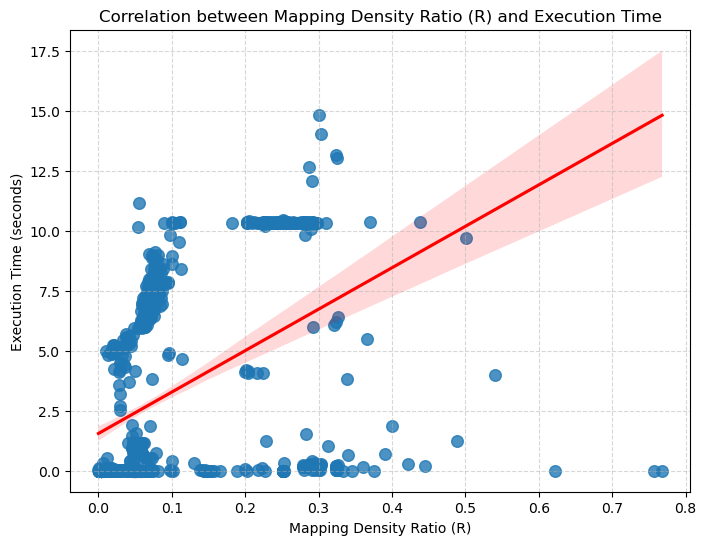

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x="Mapping_density_ratio", y="time", data=df1, scatter_kws={'s':70}, line_kws={'color':'red'})
plt.title("Correlation between Mapping Density Ratio (R) and Execution Time")
plt.xlabel("Mapping Density Ratio (R)")
plt.ylabel("Execution Time (seconds)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


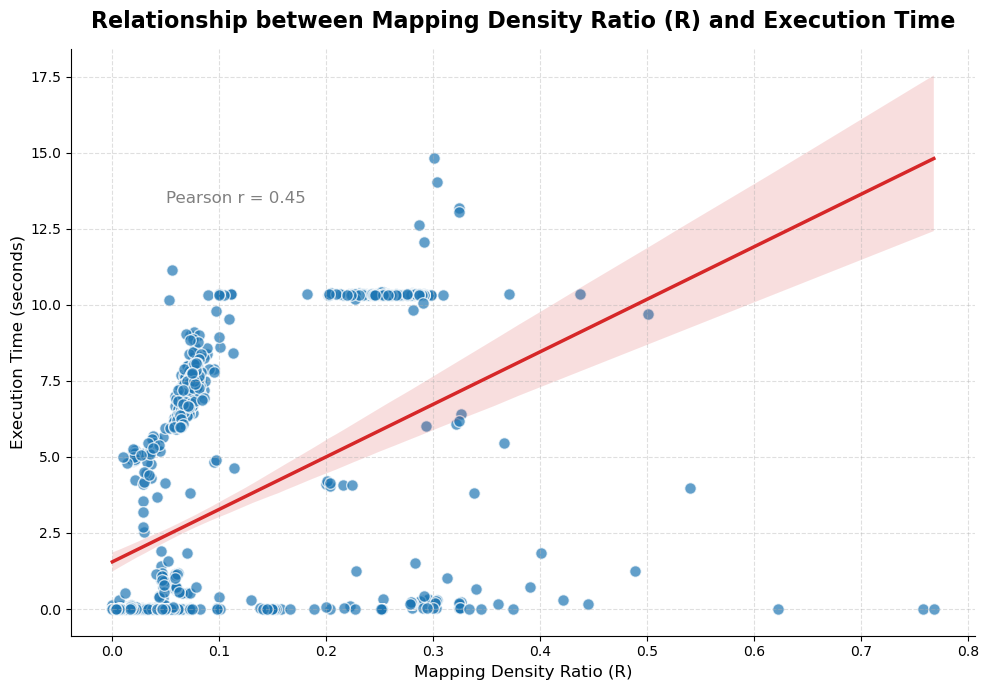

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.regplot(
    x="Mapping_density_ratio",
    y="time",
    data=df1,
    scatter_kws={'s':70, 'alpha':0.7, 'color':'#1f77b4', 'edgecolor':'white'},
    line_kws={'color':'#d62728', 'linewidth':2.5},
    ci=95
)
# Titolo e assi
plt.title("Relationship between Mapping Density Ratio (R) and Execution Time", fontsize=16, weight='bold', pad=15)
plt.xlabel("Mapping Density Ratio (R)", fontsize=12)
plt.ylabel("Execution Time (seconds)", fontsize=12)
# Limiti e griglia
# plt.xlim(0, df1["Mapping_density_ratio"].max()*1.1)
# plt.ylim(0, df1["time"].max()*1.1)
plt.grid(True, linestyle="--", alpha=0.4)

# Calcolo e visualizzazione del coefficiente di correlazione
corr = df1["Mapping_density_ratio"].corr(df1["time"])
plt.text(0.05, df1["time"].max()*0.9, f"Pearson r = {corr:.2f}", fontsize=12, color="gray")
# Bordo pulito
sns.despine()
plt.tight_layout()
plt.show()


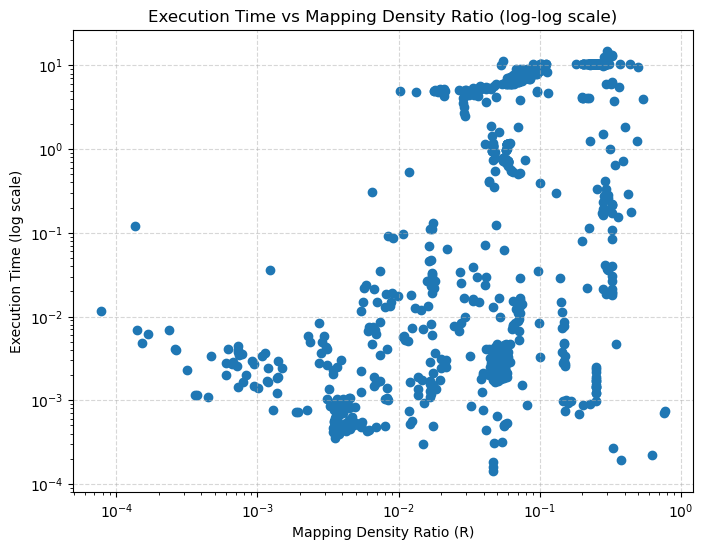

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df1["Mapping_density_ratio"], df1["time"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Mapping Density Ratio (R)")
plt.ylabel("Execution Time (log scale)")
plt.title("Execution Time vs Mapping Density Ratio (log-log scale)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
